## Redo the tutorial steps in a second notebook, but on the UDF f105w image. How many sources do you find? Histogram their fluxes.

In [65]:
import numpy as np
import sep

In [66]:
# adding more of setup for reading the test image and displaying plots
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [67]:
from astropy.utils.data import get_pkg_data_filename


image_file = get_pkg_data_filename('image.fits')
fits.info(image_file)
image_data = fits.getdata(image_file, ext=0)
print(image_data.shape)

Filename: image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     337   (256, 256)   int16 (rescales to float32)   
(256, 256)


/var/folders/mt/c42j11q54dx39ypn1k830mbc0000gn/T/ipykernel_69372/4266436872.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


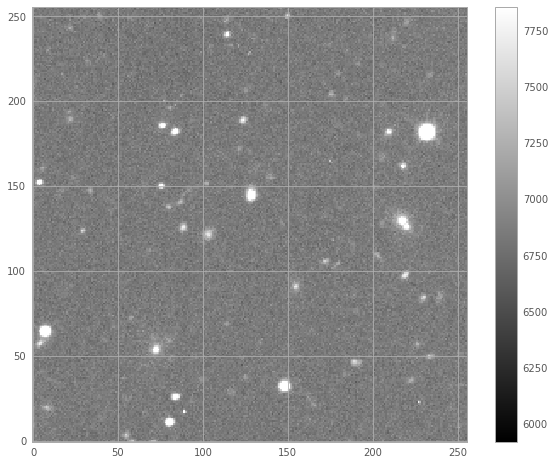

In [68]:
# now we shall show the image
m, s = np.mean(image_data), np.std(image_data)
plt.imshow(image_data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('fig5.png')

In [77]:
# measure a spatially varying background on our image
# image_data = image_data.byteswap().newbyteorder()
image_data = image_data.byteswap(False).newbyteorder()
bkg = sep.Background(image_data)

In [78]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [79]:
# now we evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

/var/folders/mt/c42j11q54dx39ypn1k830mbc0000gn/T/ipykernel_69372/3897308333.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


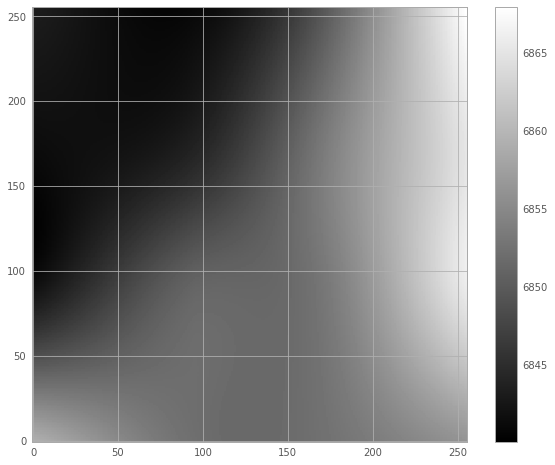

In [80]:
# now we show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('fig6.png')

In [81]:
# now we evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

/var/folders/mt/c42j11q54dx39ypn1k830mbc0000gn/T/ipykernel_69372/2446506595.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


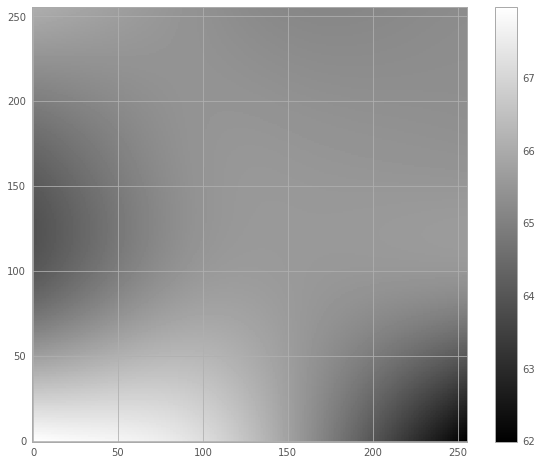

In [82]:
# next we have to show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('fig7.png')

In [83]:
# now we subtract the background
data_sub = image_data - bkg

In [84]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [85]:
# how many objects were detected
len(objects)

68

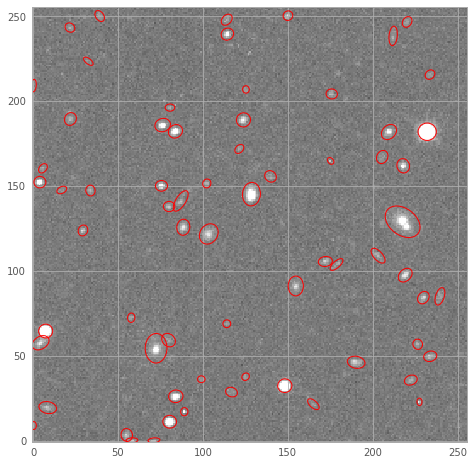

In [86]:
from matplotlib.patches import Ellipse

# next plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('fig8.png')

Text(0.5, 1.0, 'Histogram of Fluxes')

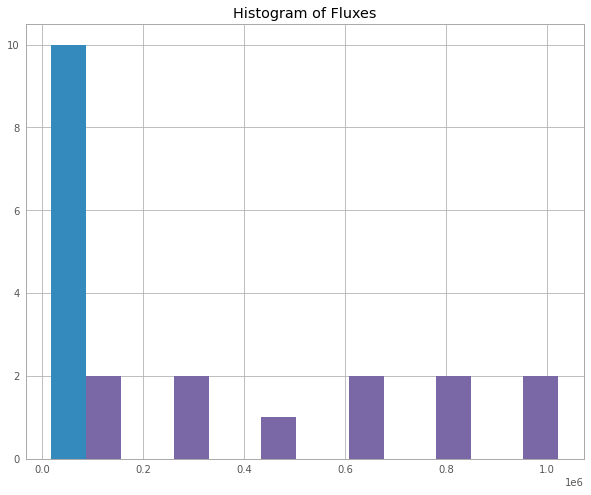

In [87]:
a=np.histogram(objects['flux'], bins=10, range=None, normed=None, weights=None, density=None)

plt.hist(a, bins = 'auto')
plt.title("Histogram of Fluxes")

In [88]:
# Mean and Median of Fluxes
m, s ,md= np.mean(objects['flux']), np.std(objects['flux']),np.median(objects['flux'])
print("Mean: ",m)
print("Standard Deviation: ",s)
print("Median: ",md)

Mean:  33171.48872644761
Standard Deviation:  132952.7422585187
Median:  3992.491455078125


In [89]:
# Calculating the largest outlier
mx= (np.max(objects['flux']))
mn = (np.min (objects['flux']))

dist1=mx-m
dist2 =m-mn
print("Distance of max value from mean: ",dist1, "\nDistance of min value from mean:",dist2)
print("Largest Outlier: ",mx)

Distance of max value from mean:  1007727.5112735524 
Distance of min value from mean: 32113.426714728863
Largest Outlier:  1040899.0


In [90]:
# Dist1 > Dist2 means the biggest outlier in the flux is dist1 which is 1218.3980712890625

final = dist1/md
print("Largest Outlier's distance from the mean in terms of Standard Deviations: ",final)

# The largest outlier is 34888.817028312566 Standard Deviations away 

Largest Outlier's distance from the mean in terms of Standard Deviations:  252.40567766070103


In [91]:
# Last we have to begin locating the position of the outlier on the image
result = np.where(objects['flux'] == mx)
print(result)

(array([53]),)
